## Project 1 Exploratory Analysis 

The goal of this notebook is to perform exploratory analysis on the wines datasets in order to create a classification model for identifying the quality of a wine based on the features in the dataset. 

Plan of action:
- visualize the data to identify patterns and relationships
- determine which of the features to include in the analysis
- train the model and test the model using a k-folds training approach

The quality of the wine is based upon sensory data and is scored on a scale of 0 to 10, 0 being the lowest quality and 10 being the highest. The categories for good, okay, and bad wine are based on this scale, with 1-4 being bad, 5-6 being okay, and 7-10 being good. (while the range of possible scores is 10, the actual scores span 3 to 9, which is why the data is split into these groups).

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # for visualizations
import seaborn as sns #for visualizations
import timeit
start_time = timeit.default_timer()


In [2]:
#import my data
winesdf = pd.read_csv('./WinesData.csv')
winesdf

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,categories
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1,just okay wine
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1,just okay wine
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1,just okay wine
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1,just okay wine
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1,just okay wine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0,just okay wine
6493,4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0,just okay wine
6494,4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0,just okay wine
6495,4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,0,good wine


In [3]:
winesdf.drop('Unnamed: 0', axis=1, inplace = True)
winesdf.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'type', 'categories'],
      dtype='object')

In [4]:
winesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  type                  6497 non-null   int64  
 12  categories            6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
winesdf.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,1.000000


In [6]:
winesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  type                  6497 non-null   int64  
 12  categories            6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


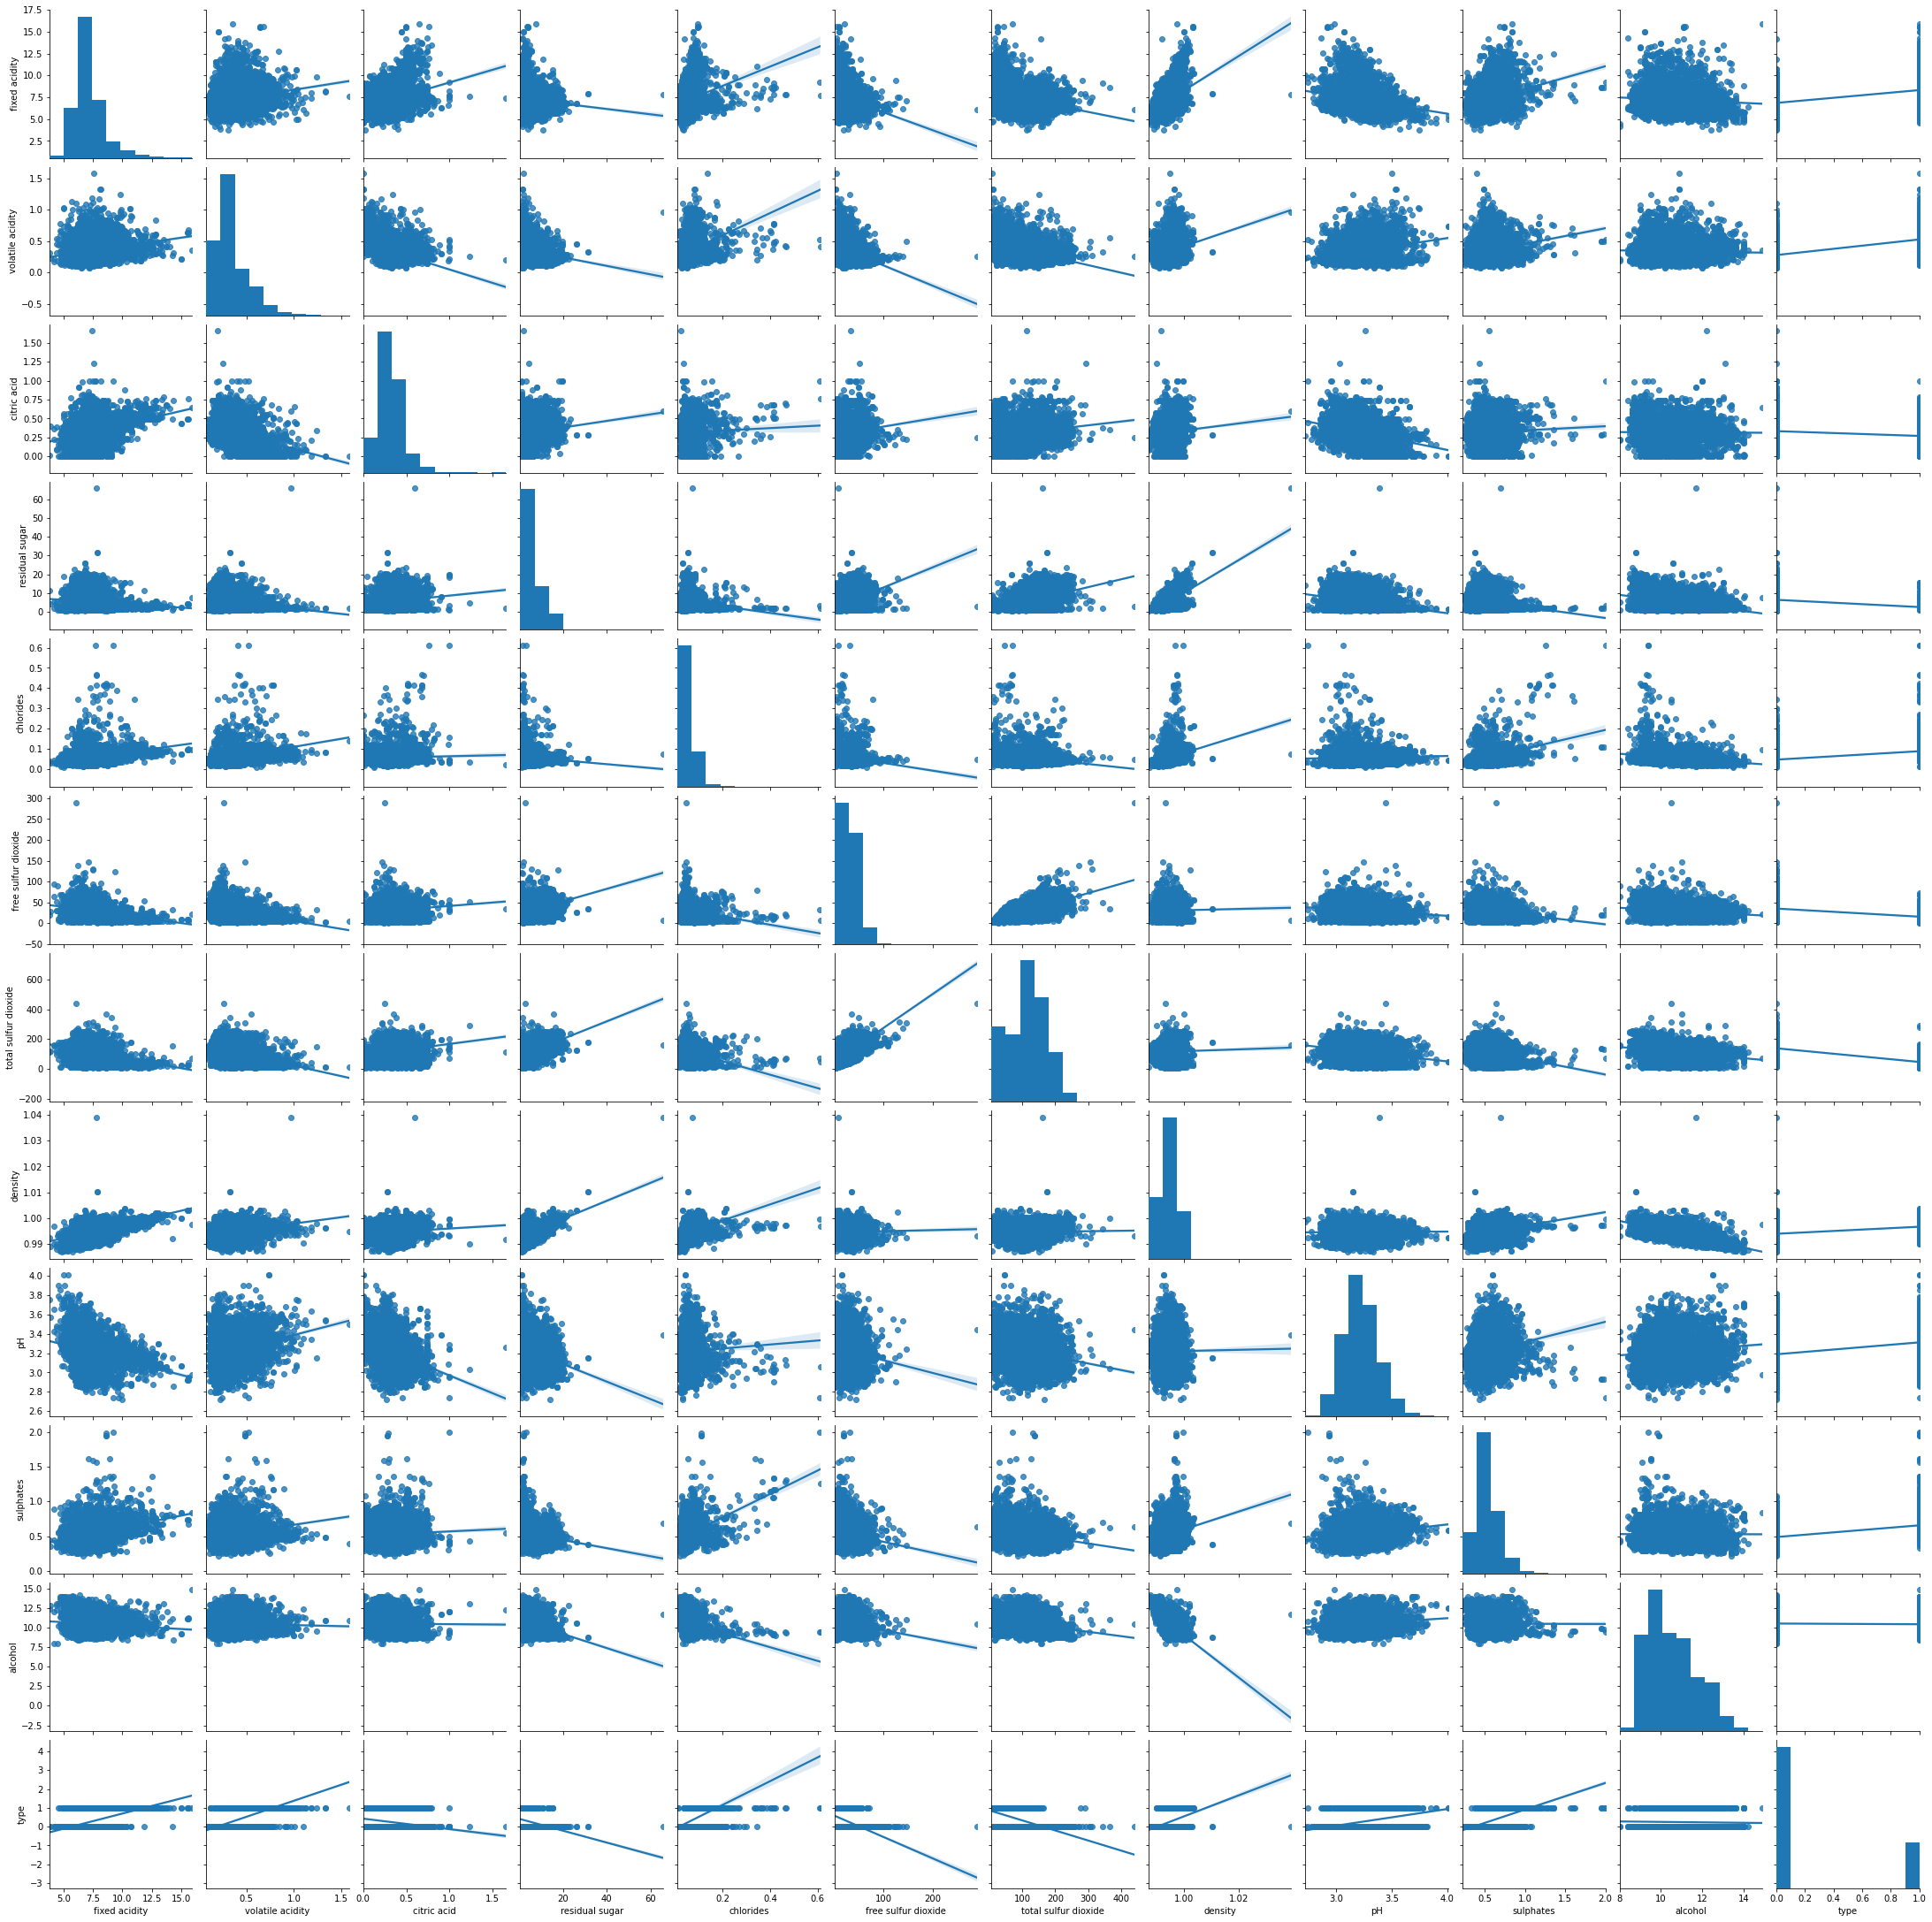

In [7]:
sns.pairplot(winesdf, kind = 'reg', vars = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol','type']) #I will cross all the predictor variables with eachother to find any strongly correlated ones
plt.show()

Apparently colinear features based on the single regressions above:

Alcohol and density,
Total Sulfure dioxide and free sulfur dioxide,
Type and Chlorides and density and acidity,
acidity and density

for now, I will leave all of the variables in, in order to improve the model as best I can

I will start by exploring classification using a decision tree and then try a logistic regressioln approach 

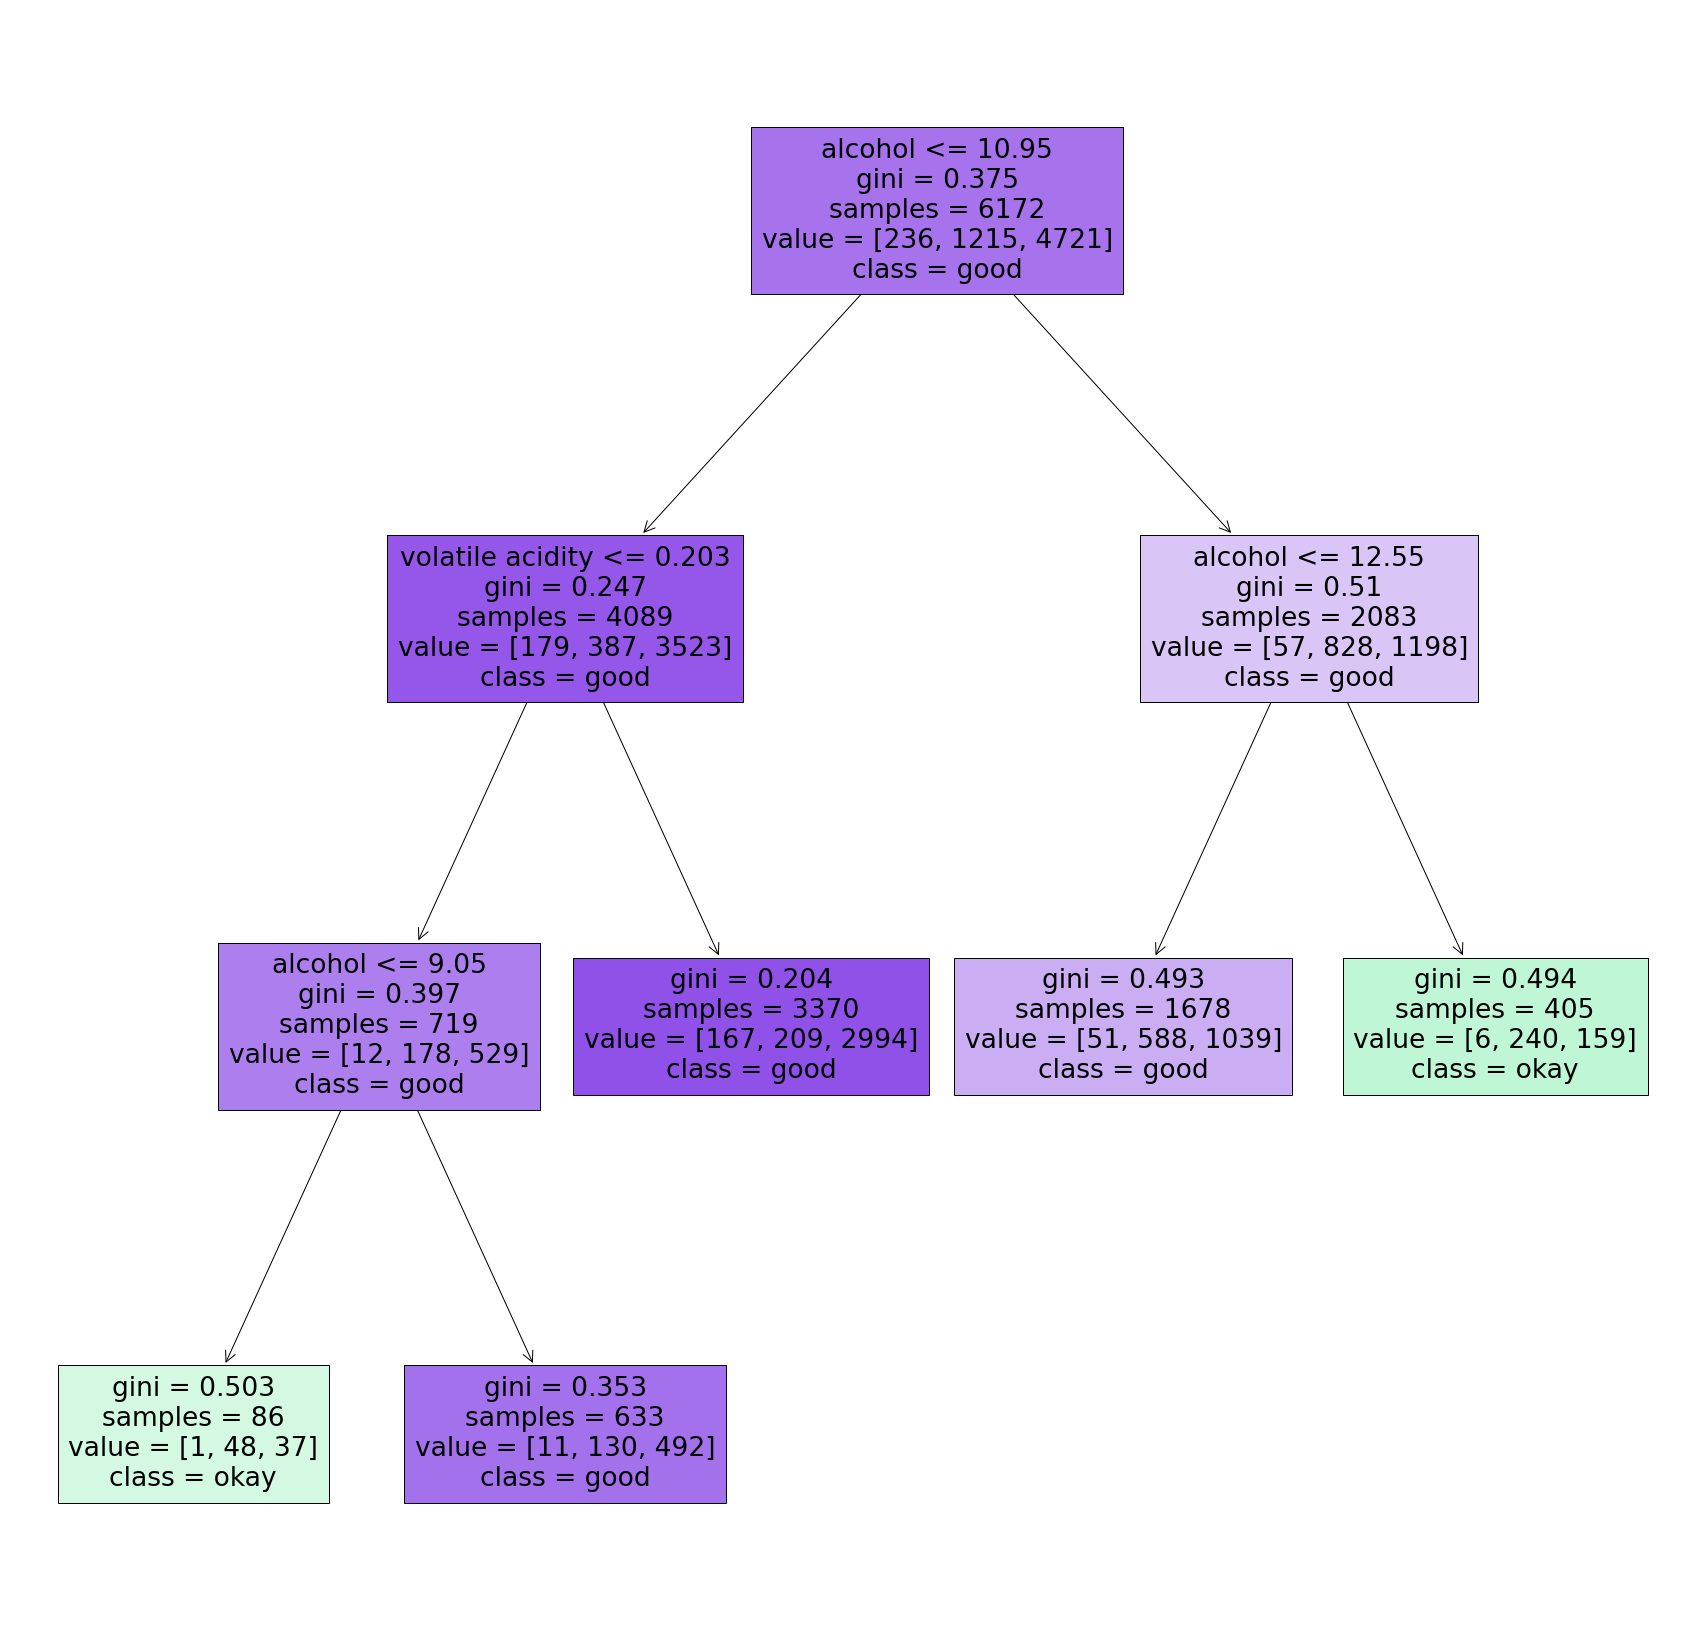

In [8]:
#Used lecture 6 notebook as guidance for this function
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
#I attempted to normalize the data before running the model in order to lead to improved accuracy. This failed to produce a more accurate model
#from sklearn import preprocessing #https://scikit-learn.org/stable/modules/preprocessing.html


varlist = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol','type']

X = winesdf[varlist]
y = winesdf['categories']

#get training set, set asside test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .05, random_state=10)
#X_scaled = preprocessing.scale(X_train)
estimator = tree.DecisionTreeClassifier(max_leaf_nodes = 5)
estimator = estimator.fit(X_train, y_train)

fig = plt.figure(figsize= (30,30))
_ = tree.plot_tree(estimator, 
                   feature_names= varlist,
                   class_names = ['bad', 'okay', 'good'],
                    filled=True)



In [9]:
from sklearn.model_selection import cross_val_score #https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation used this page to determine how to use this
scores = cross_val_score(estimator, X, y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.75 (+/- 0.06)


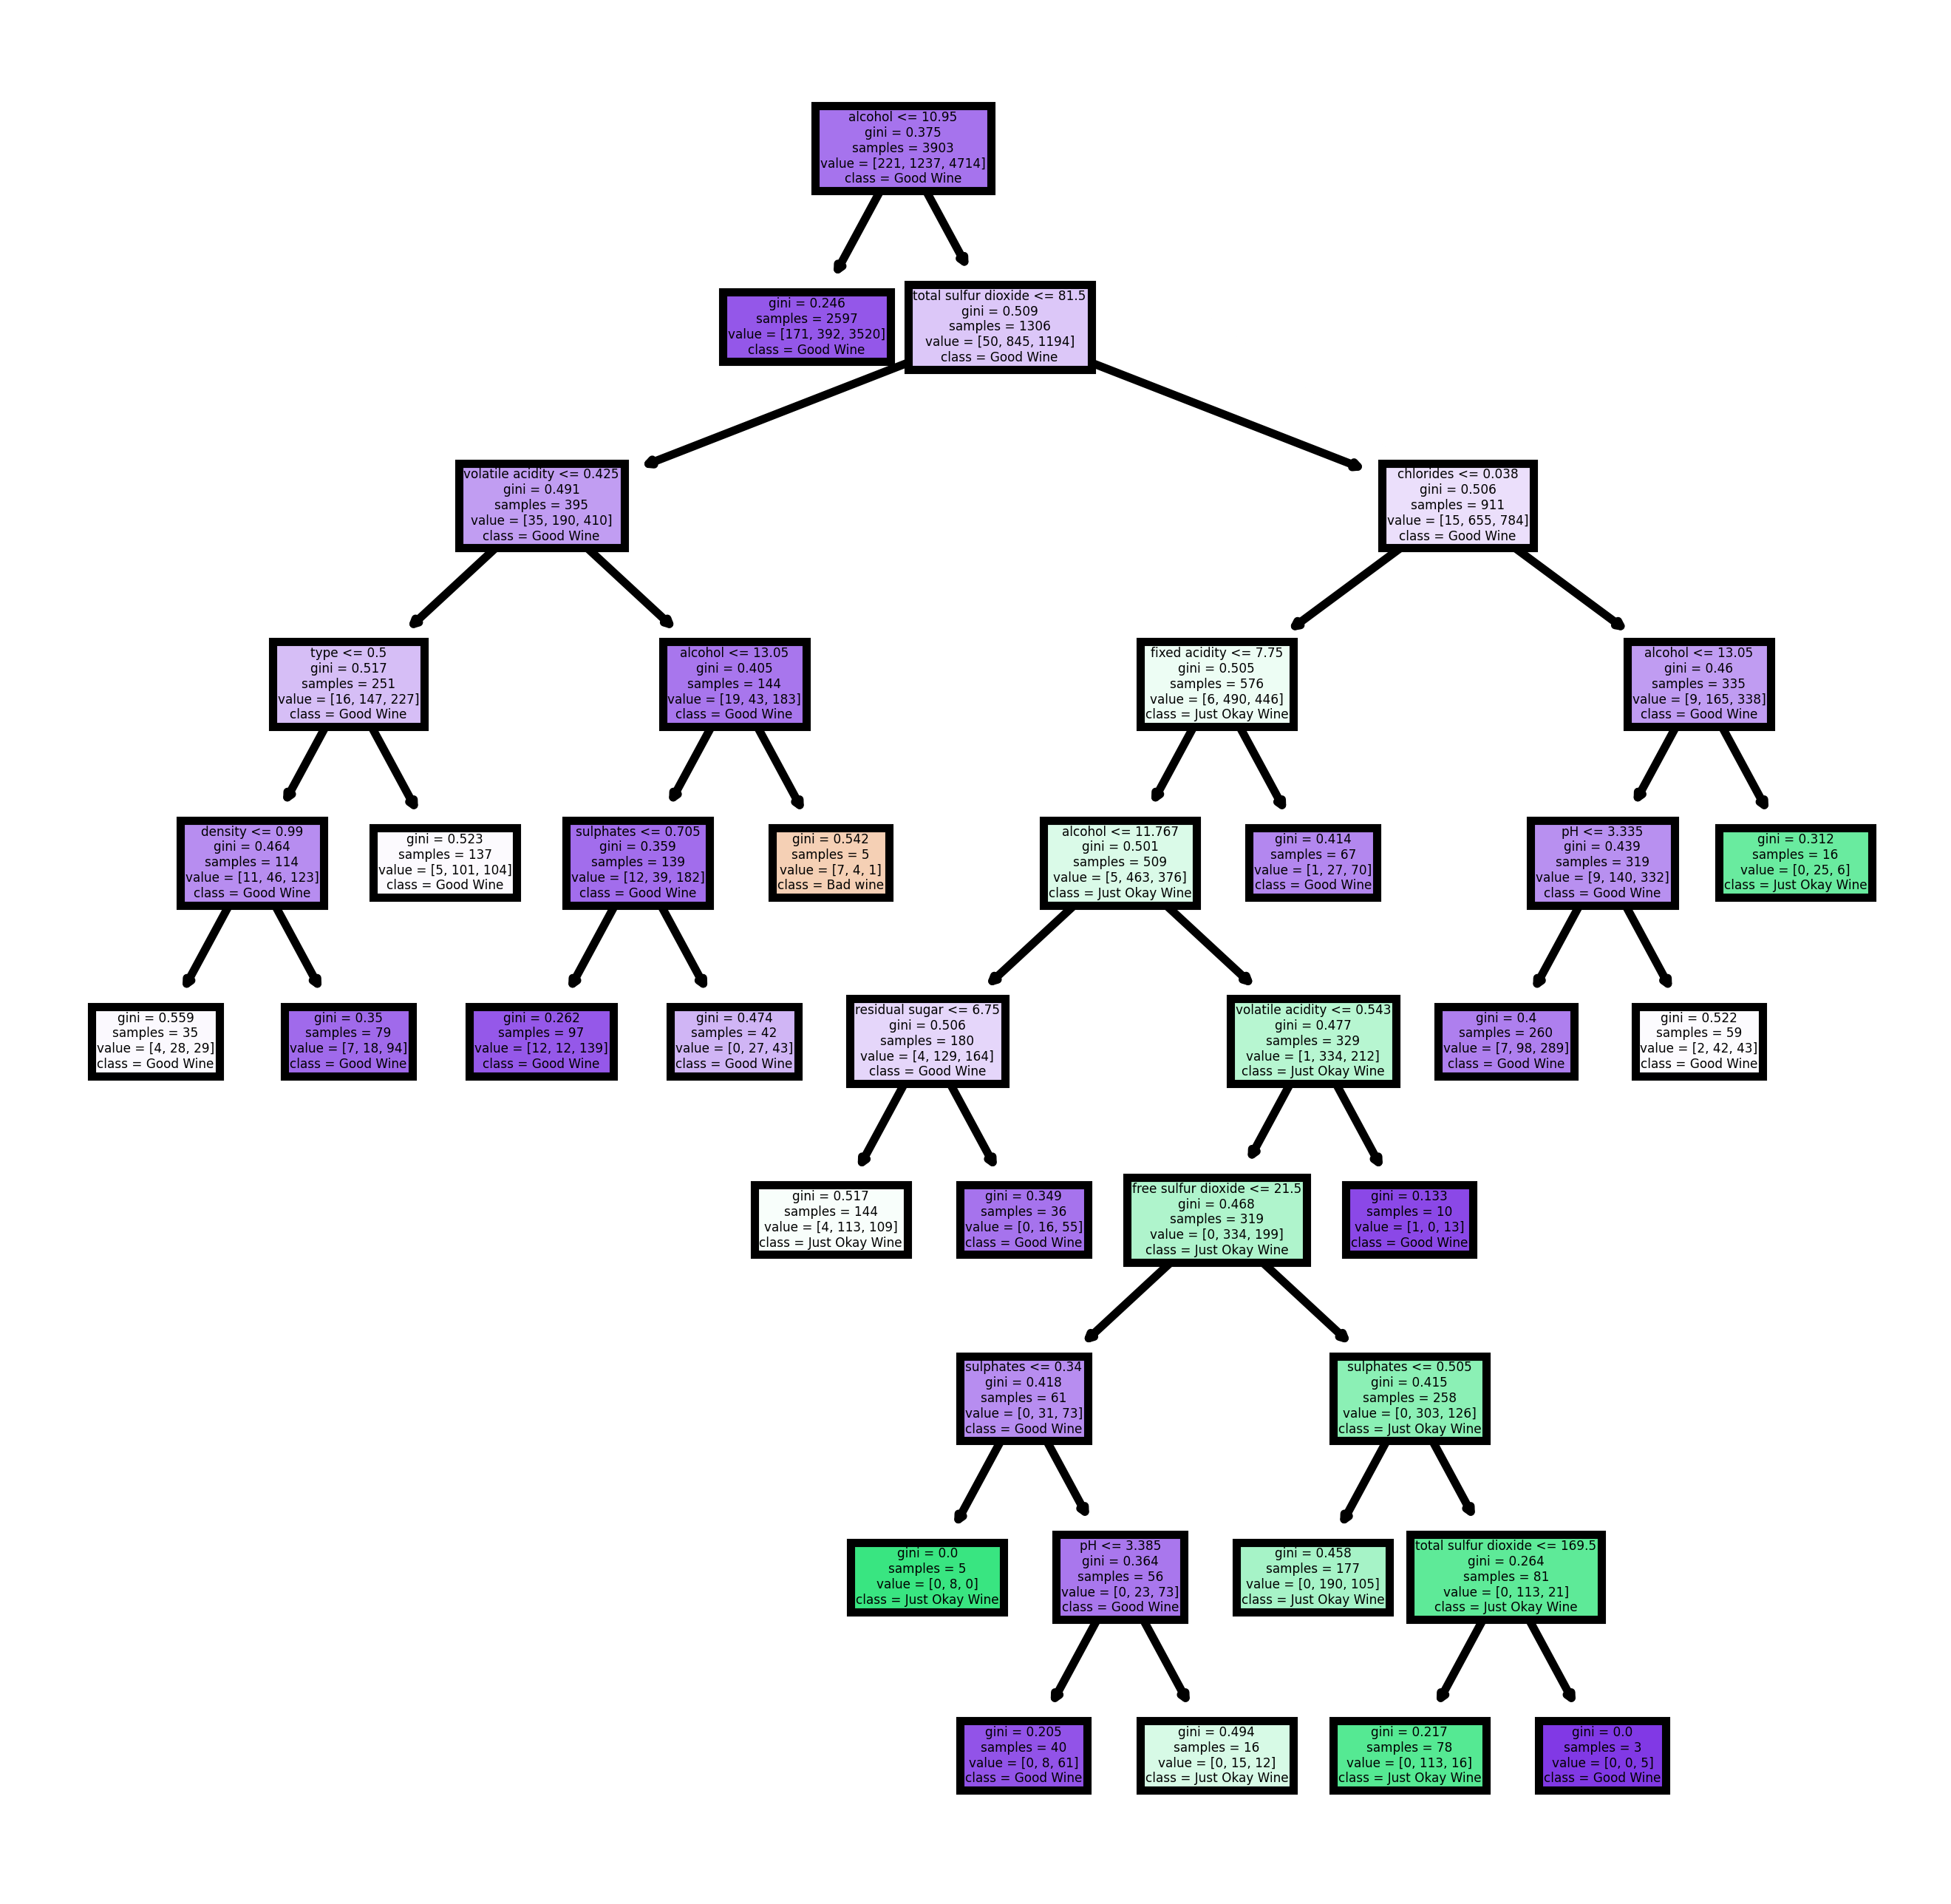

In [10]:
from sklearn.ensemble import RandomForestClassifier #Used https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html to identify how to use
from sklearn import tree

estimator = RandomForestClassifier(max_leaf_nodes=20)
estimator = estimator.fit(X_train, y_train)

#I got the following from https://stackoverflow.com/questions/40155128/plot-trees-for-a-random-forest-in-python-with-scikit-learn

fn=varlist
cn=['Bad wine', 'Just Okay Wine', 'Good Wine']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(estimator.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')

In [11]:
scores = cross_val_score(estimator, X, y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.78 (+/- 0.03)


In [12]:
y_test.value_counts()

just okay wine    253
good wine          62
bad wine           10
Name: categories, dtype: int64

Looking through the leaves here, I can see that only values of 5 or 6 level quality are being predicted. This excludes the extremes. As a result, I will try balancing the data using the class_weight attribute

To continue testing the model, I iterated through variables, removing them one at a time and then adding them back in to improve the accuracy

In [13]:
from sklearn.linear_model import LogisticRegression #https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
logreg = LogisticRegression(max_iter =10000)
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))
scores = cross_val_score(logreg, X_test, y_test, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy of Logistic regression classifier on training set: 0.78
Accuracy of Logistic regression classifier on test set: 0.81
Accuracy: 0.82 (+/- 0.09)


Upon testing a logistic regression model, the accuracy is poor for both the test set and training set. I will therefore try to perform a crossvalidation

                precision    recall  f1-score   support

      bad wine       0.00      0.00      0.00        10
     good wine       0.71      0.27      0.40        62
just okay wine       0.82      0.97      0.89       253

      accuracy                           0.81       325
     macro avg       0.51      0.42      0.43       325
  weighted avg       0.77      0.81      0.77       325

[[  0   1   9]
 [  0  17  45]
 [  1   6 246]]


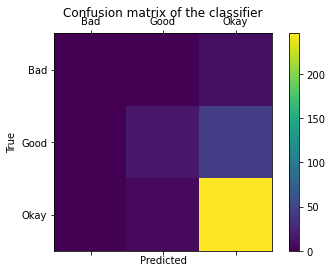

In [14]:
from sklearn.metrics import classification_report #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
from sklearn.metrics import confusion_matrix #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
pred = logreg.predict(X_test)
print(classification_report(y_test, pred, zero_division = 0))

#The following code came from https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels, which I found while looking for a better 
#way to visualize a confusion matrix
cm = confusion_matrix(y_test, pred)
print(cm)
labels = ['Bad','Good', 'Okay']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

To dig in a little further to the results of the logistic regression, I ran a classification report and confusion matrix. To quickly provide some interpretation of these two metrics, I will explain what they are and what they mean. 

from the classification report shown, I can see that there were 45 cases where the precision was zero (any case with a predicted quality of 3, 4, or 8). 
Additionally, the precision is around 50% for the remaining cases., which is not a strong level of accuracy. 

The array and figure following the classification report in the output represents the confusion matrix which basically crosses the true value of the output with the predicted value of the output. Based on the figure, I can see that the model is best at predicting wine quality with a value of 6 (also the one with the most data points in the dataset) and drops off quickly for other quality values. 


## Best accuracy: Random Forest

The next step in my exploration will be to use the random forest method to select the most important features, in order to simplify and hopefuly improve accuracy of the model

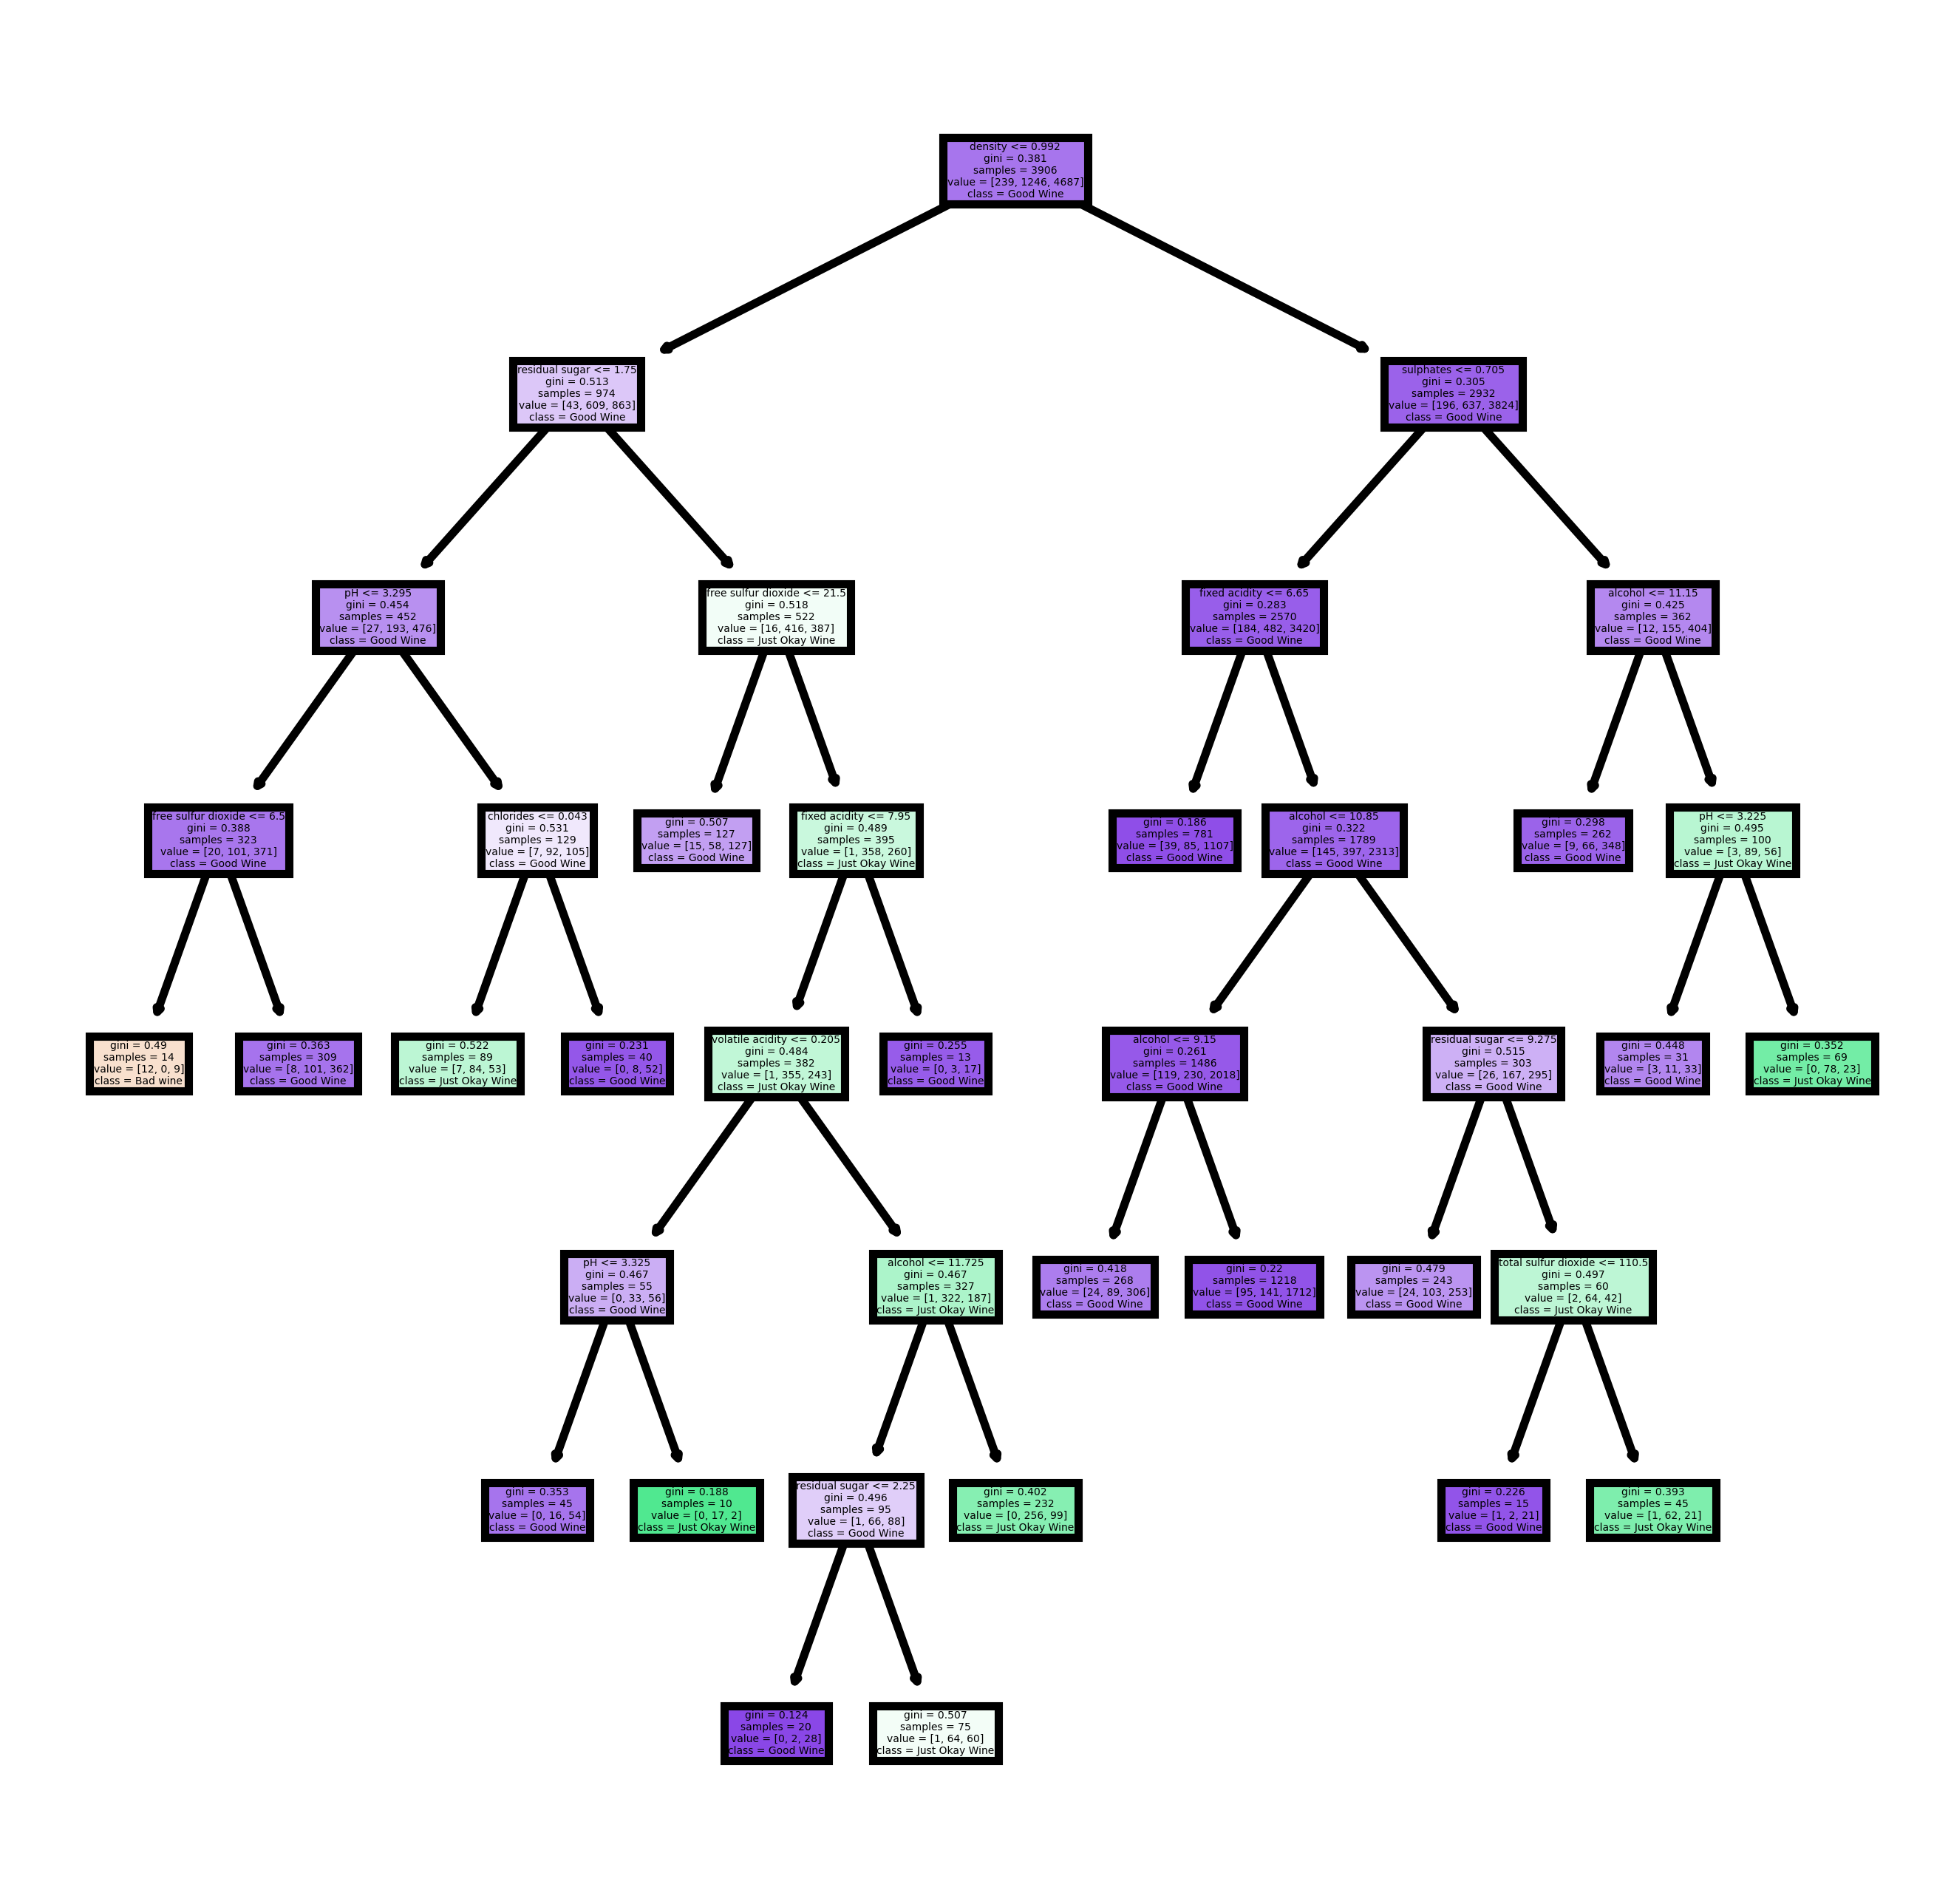

In [15]:
estimator = RandomForestClassifier(max_leaf_nodes=20)
estimator = estimator.fit(X_train, y_train)

#I got the following from https://stackoverflow.com/questions/40155128/plot-trees-for-a-random-forest-in-python-with-scikit-learn

fn=varlist
cn=['Bad wine', 'Just Okay Wine', 'Good Wine']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(estimator.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')

                precision    recall  f1-score   support

      bad wine       0.00      0.00      0.00        10
     good wine       0.84      0.26      0.40        62
just okay wine       0.82      0.99      0.89       253

      accuracy                           0.82       325
     macro avg       0.55      0.42      0.43       325
  weighted avg       0.80      0.82      0.77       325

[[  0   0  10]
 [  0  16  46]
 [  0   3 250]]


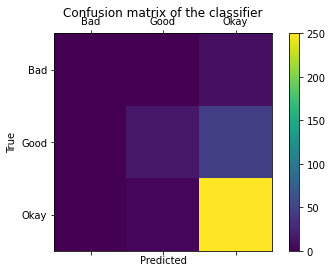

In [16]:
pred = estimator.predict(X_test)
print(classification_report(y_test, pred, zero_division = 0))

#The following code came from https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels, which I found while looking for a better 
#way to visualize a confusion matrix
cm = confusion_matrix(y_test, pred)
print(cm)
labels = ['Bad','Good', 'Okay']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

I used the blog post: https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f to figure out how to perform feature selection with sklearn and randomforest

In [17]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestClassifier(n_estimators = 12))

In [18]:
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=12))

In [19]:
sel.get_support()

array([False,  True, False, False,  True,  True,  True,  True, False,
       False,  True, False])

In [20]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
1629,8.5,0.24,0.39,10.40,0.044,20.0,142.0,0.99740,3.20,0.53,10.0,0
2863,7.2,0.14,0.35,1.20,0.036,15.0,73.0,0.99380,3.46,0.39,9.9,0
413,9.9,0.40,0.53,6.70,0.097,6.0,19.0,0.99860,3.27,0.82,11.7,1
5404,8.3,0.18,0.30,1.10,0.033,20.0,57.0,0.99109,3.02,0.51,11.0,0
3560,9.5,0.21,0.47,1.30,0.039,21.0,123.0,0.99590,2.90,0.64,9.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1180,8.2,0.35,0.33,2.40,0.076,11.0,47.0,0.99599,3.27,0.81,11.0,1
3441,8.2,0.18,0.31,11.80,0.039,96.0,249.0,0.99760,3.07,0.52,9.5,0
1344,11.5,0.42,0.48,2.60,0.077,8.0,20.0,0.99852,3.09,0.53,11.0,1
4623,7.0,0.13,0.37,12.85,0.042,36.0,105.0,0.99581,3.05,0.55,10.7,0


In [21]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

6

In [22]:
print(selected_feat)

Index(['volatile acidity', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'alcohol'],
      dtype='object')


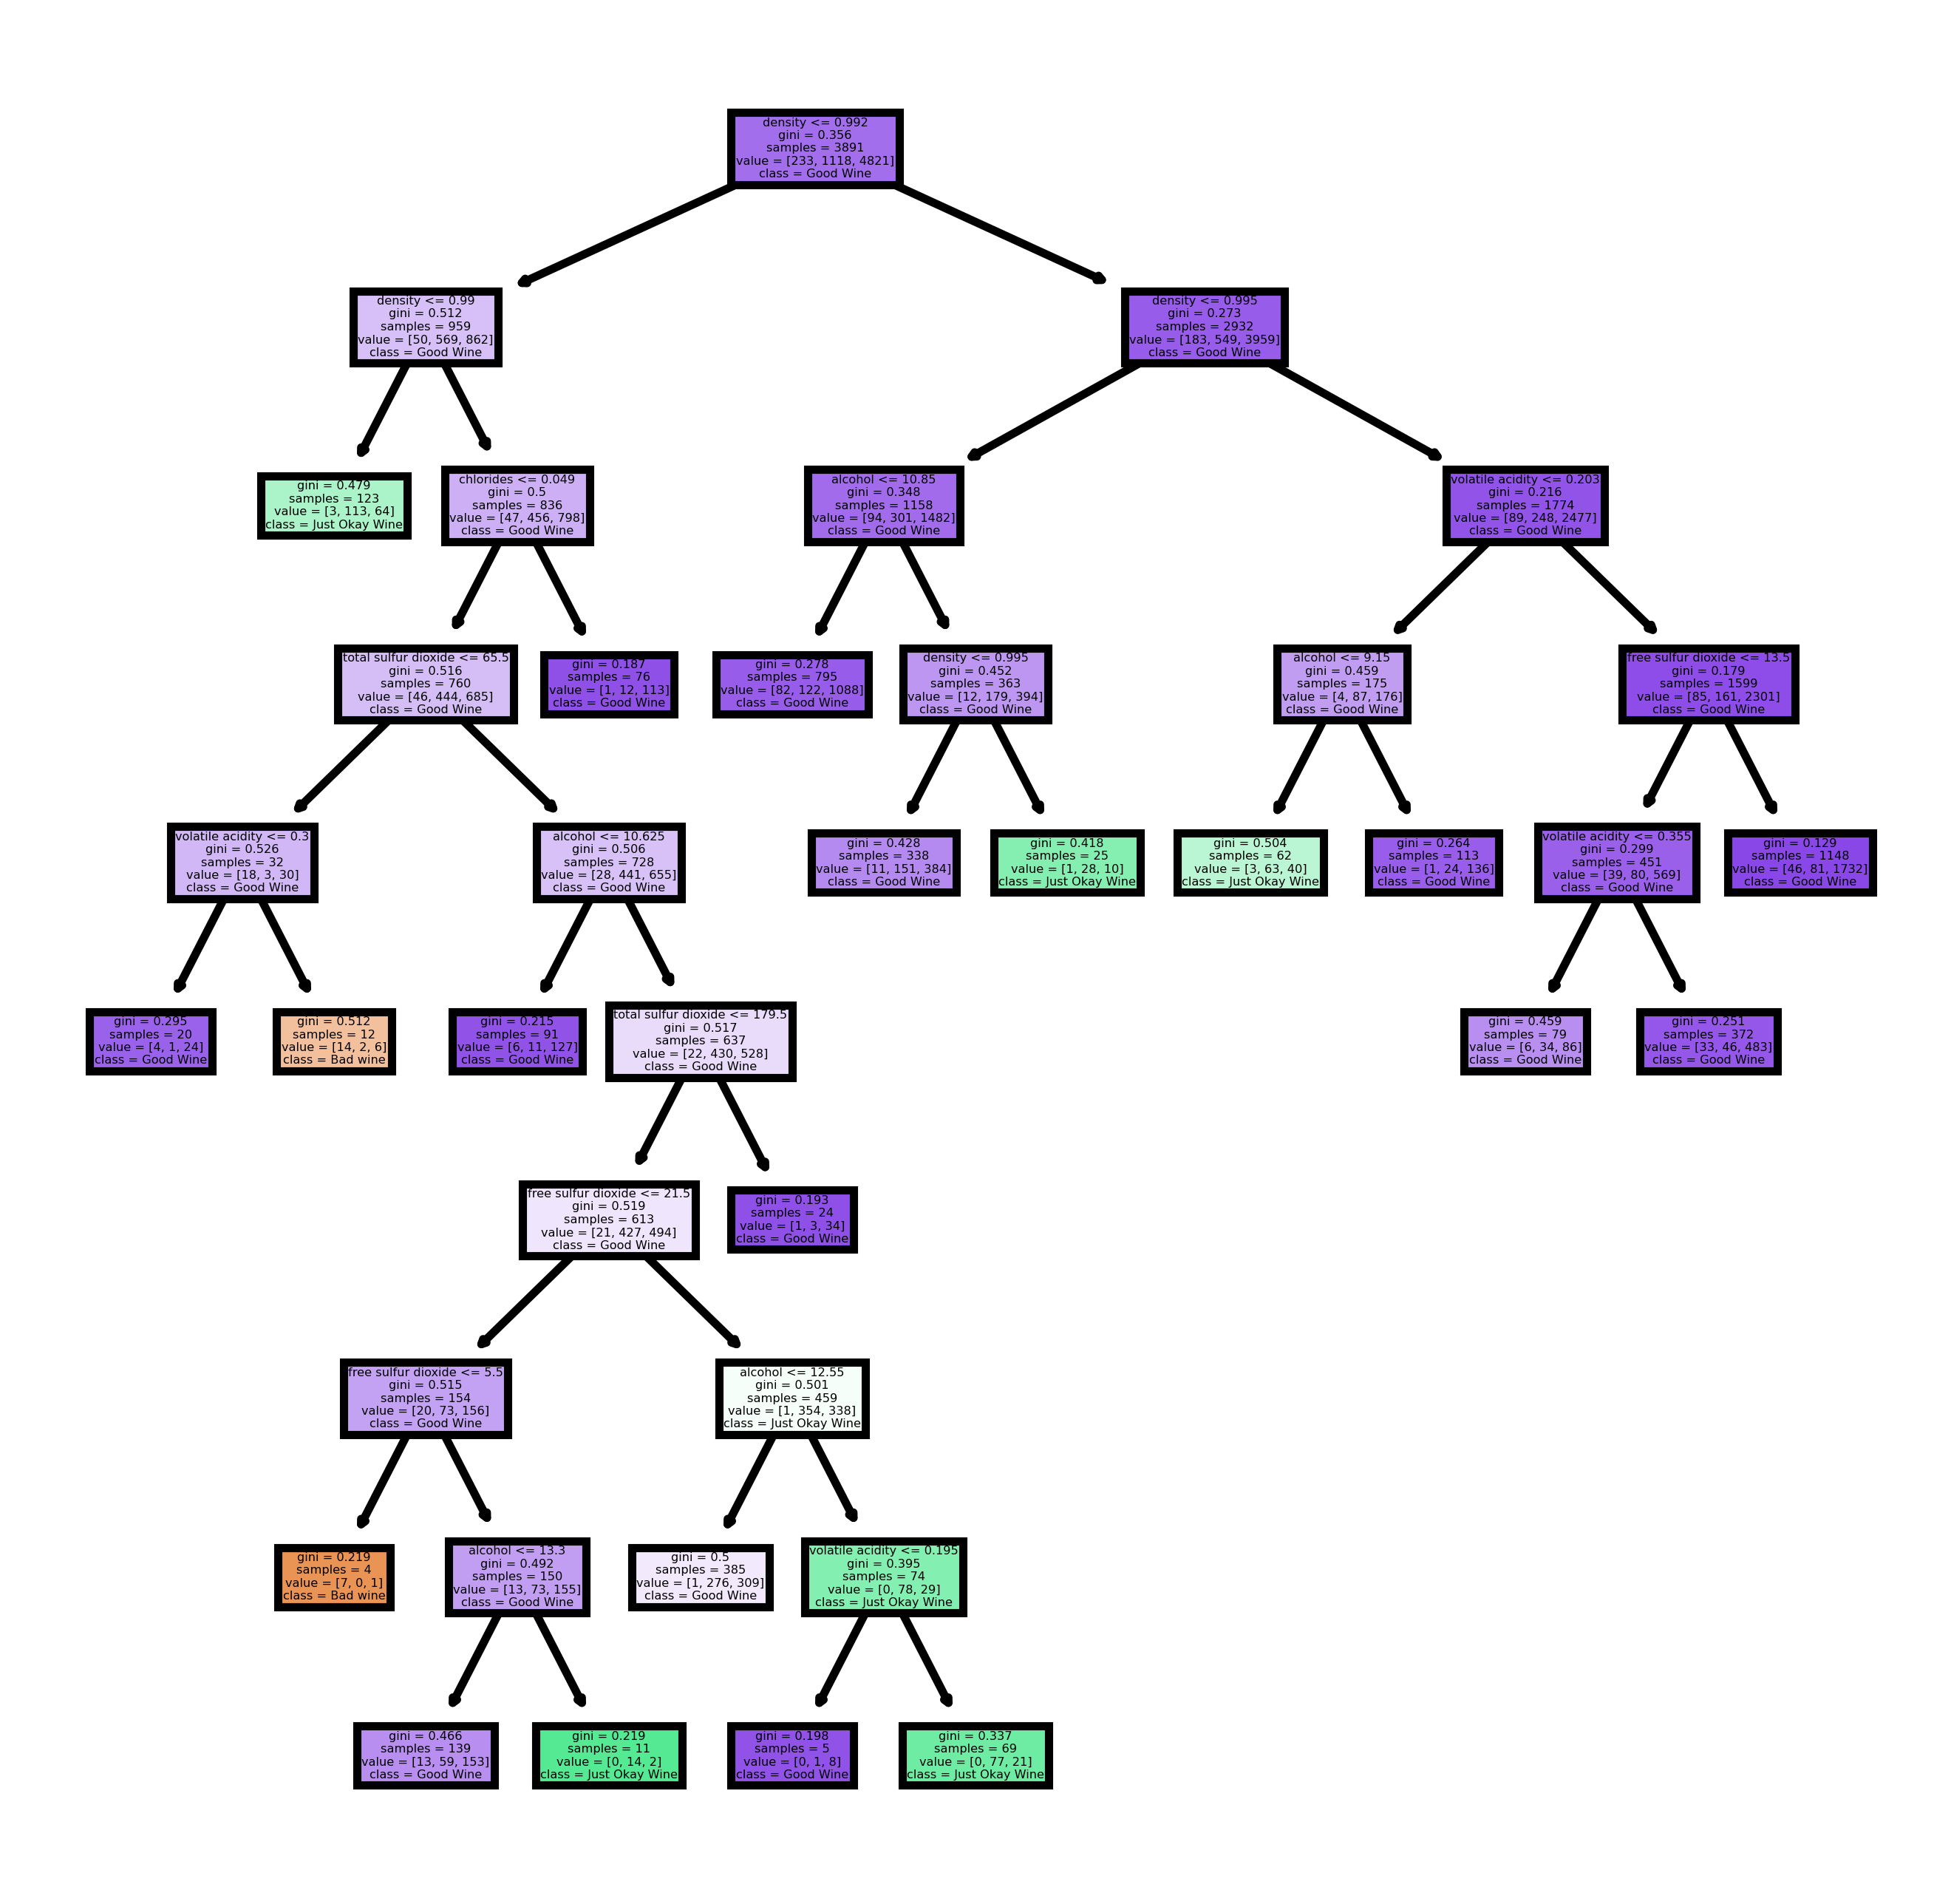

In [23]:

X = winesdf[selected_feat]
y = winesdf['categories']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .05, random_state=0)
estimator = RandomForestClassifier(max_leaf_nodes=20)
estimator = estimator.fit(X_train, y_train)

fn=selected_feat
cn=['Bad wine', 'Just Okay Wine', 'Good Wine']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(estimator.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('individualtree.png')

In [24]:
scores = cross_val_score(estimator, X, y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.78 (+/- 0.03)


                precision    recall  f1-score   support

      bad wine       0.00      0.00      0.00        14
     good wine       0.65      0.18      0.28        72
just okay wine       0.76      0.97      0.85       239

      accuracy                           0.75       325
     macro avg       0.47      0.38      0.38       325
  weighted avg       0.70      0.75      0.69       325

[[  0   0  14]
 [  0  13  59]
 [  0   7 232]]


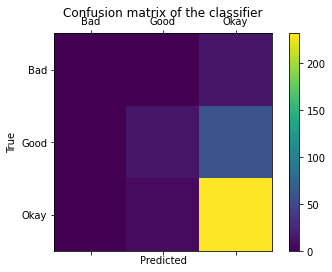

In [25]:
pred = estimator.predict(X_test)
print(classification_report(y_test, pred, zero_division = 0))

#The following code came from https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels, which I found while looking for a better 
#way to visualize a confusion matrix
cm = confusion_matrix(y_test, pred)
print(cm)
labels = ['Bad','Good', 'Okay']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Based on the above results this model is decent at predicting which wines will be okay or good, but is unable to destinguish between bad and okay wines. Additional data on very bad and very good wines may be necessary to improve this model further, however, the percent of accurate 'good' is an improvement on previous models. 

In [26]:
elapsed = timeit.default_timer() - start_time
print(str(elapsed) + " seconds")

90.2613578 seconds
